In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Vaishanavi\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [46]:

df = pd.read_csv('Telco_Churn_Customer.csv')

In [47]:

df.head() 

CUSTOMER_ID  SERVICE_ID  GENDER  AGE  SENIORCITIZEN PARTNER DEPENDENTS  \
0     98910201  2922-HMSSD    Male   29              0     Yes         No   
1     24802716  7952-HCACS    Male   65              1     Yes        Yes   
2     68785447  9622-BHCFG  Female   39              0      No        Yes   
3      2073488  5738-KZTVO    Male   66              1      No         No   
4     48861275  7343-ZEJNS    Male   69              1     Yes        Yes   

              CITY      STATE COUNTRY  ...  INTERNET_SERVICE DATA_USAGE  \
0            Saket  New Delhi   India  ...          Wireless       7.84   
1       Karol Bagh  New Delhi   India  ...                No       0.00   
2  Connaught Place  New Delhi   India  ...          Wireless       9.08   
3            Delhi  New Delhi   India  ...          Wireless       1.84   
4            Saket  New Delhi   India  ...       Fiber optic       2.96   

  TEXT_MSGS VOICE_MINUTES MONTHLY_BILL                   CHURN_REASON  \
0       937           693       602.52   Attitude of service provider   
1       558           607       436.90                    Not Churned   
2         0             0       317.04  Competitor had better devices   
3       293           307       344.32                    Not Churned   
4       485           693       493.88                    Not Churned   

   CHURNED        Contract PaymentMethod PaperlessBilling  
0      Yes        Two year        Cheque               NO  
1       No  Month-to-month        Cheque               NO  
2      Yes        Two year   Credit Card              YES  
3       No        One year   Credit Card              YES  
4       No  Month-to-month    Debit Card              YES  

[5 rows x 29 columns]

In [48]:

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUSTOMER_ID              20000 non-null  int64  
 1   SERVICE_ID               20000 non-null  object 
 2   GENDER                   20000 non-null  object 
 3   AGE                      20000 non-null  int64  
 4   SENIORCITIZEN            20000 non-null  int64  
 5   PARTNER                  20000 non-null  object 
 6   DEPENDENTS               20000 non-null  object 
 7   CITY                     20000 non-null  object 
 8   STATE                    20000 non-null  object 
 9   COUNTRY                  20000 non-null  object 
 10  ZIP_CODE                 20000 non-null  int64  
 11  CUSTOMER_SINCE           20000 non-null  object 
 12  CUSTOMER_SEGMENT         20000 non-null  object 
 13  CUSTOMER_TYPE            20000 non-null  object 
 14  CUSTOMER_DISCONNCT_DAT

In [49]:

df['MONTHLY_BILL']=pd.to_numeric(df['MONTHLY_BILL'],errors='coerce')


df['CHURNED']=df['CHURNED'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [50]:

cat_cols = [i for i in df.columns if df[i].dtype == object]


for col in ['CUSTOMER_ID', 'SERVICE_ID','CUSTOMER_SINCE','CUSTOMER_DISCONNCT_DATE','COUNTRY','STATE','CHURN_REASON']:
    if col in cat_cols:
        cat_cols.remove(col)

In [51]:


for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  GENDER
GENDER
Male      10020
Female     9980
Name: count, dtype: int64
-----------------------------
Column Name:  PARTNER
PARTNER
No     10010
Yes     9990
Name: count, dtype: int64
-----------------------------
Column Name:  DEPENDENTS
DEPENDENTS
No     10148
Yes     9852
Name: count, dtype: int64
-----------------------------
Column Name:  CITY
CITY
Chandni Chowk      2093
Old Delhi          2025
Karol Bagh         2023
Saket              2008
Lajpat Nagar       1997
Dwarka             1987
Connaught Place    1984
Delhi              1984
New Delhi          1972
Rohini             1927
Name: count, dtype: int64
-----------------------------
Column Name:  CUSTOMER_SEGMENT
CUSTOMER_SEGMENT
individual    6709
family        6666
corporate     6625
Name: count, dtype: int64
-----------------------------
Column Name:  CUSTOMER_TYPE
CUSTOMER_TYPE
postpaid    10043
prepaid      9957
Name: count, dtype: int64
-----------------------------
Column Name:  CUSTOMER_STATUS
CUSTOMER_

## Lets create Kaplan Meier Curves for Cohorts

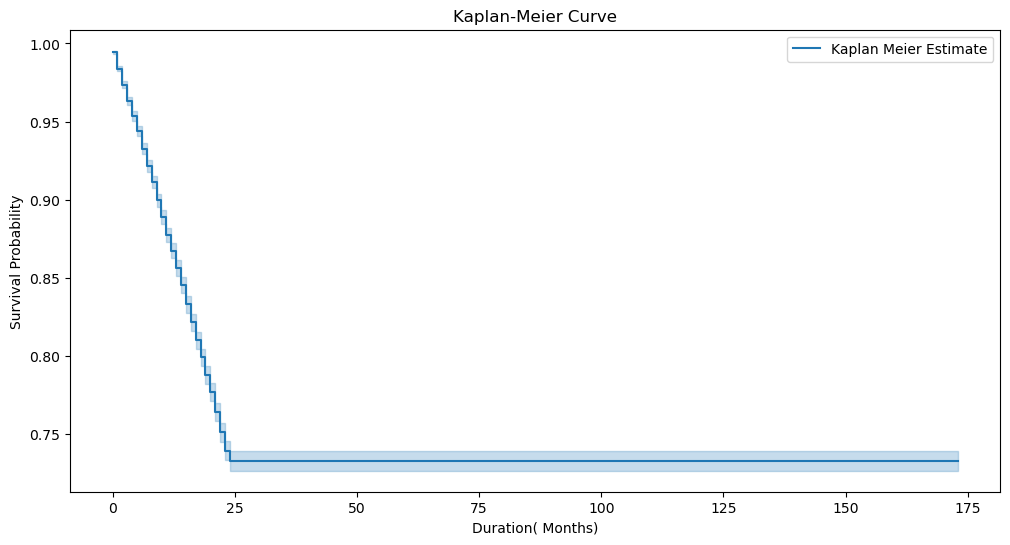

In [8]:



durations = df['TENURE']  
event_observed = df['CHURNED']  


km = KaplanMeierFitter()


km.fit(durations, event_observed, label='Kaplan Meier Estimate')


km.plot()

plt.title('Kaplan-Meier Curve')
plt.xlabel('Duration( Months)')
plt.ylabel('Survival Probability')  # Label for the y-axis
plt.savefig('TENURE.png', dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
# Show the plot
plt.show()


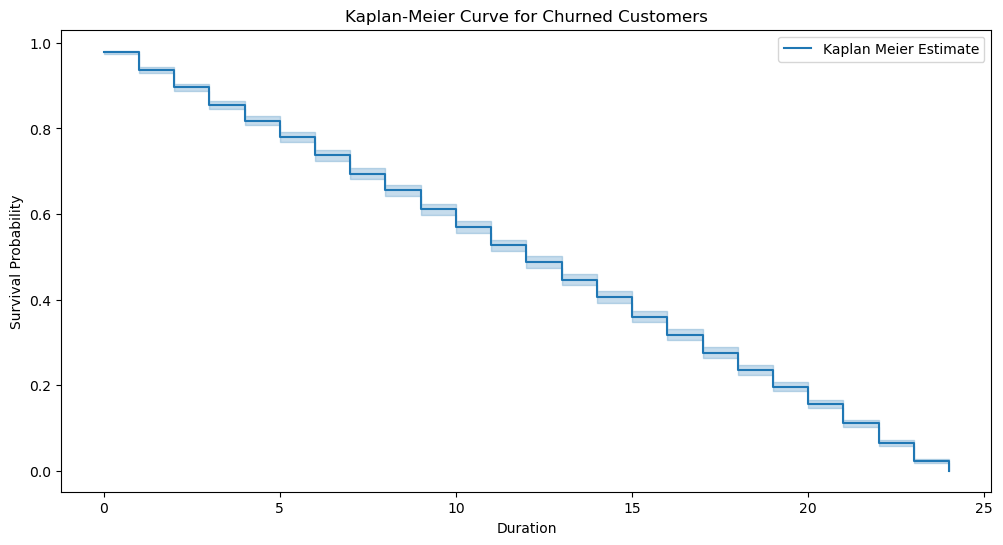

In [9]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


churned_df = df[df['CHURNED'] == 1]


durations = churned_df['TENURE']
event_observed = churned_df['CHURNED']  # This will be all 1's since we only have churned customers


km = KaplanMeierFitter()


km.fit(durations, event_observed, label='Kaplan Meier Estimate')


km.plot()
# Add labels to the plot
plt.title('Kaplan-Meier Curve for Churned Customers')
plt.xlabel('Duration')
plt.ylabel('Survival Probability')  # Label for the y-axis

# Show the plot
plt.show()


## Lets create Kaplan Meier Curves for Cohorts

<Axes: xlabel='timeline', ylabel='Survival Probability'>

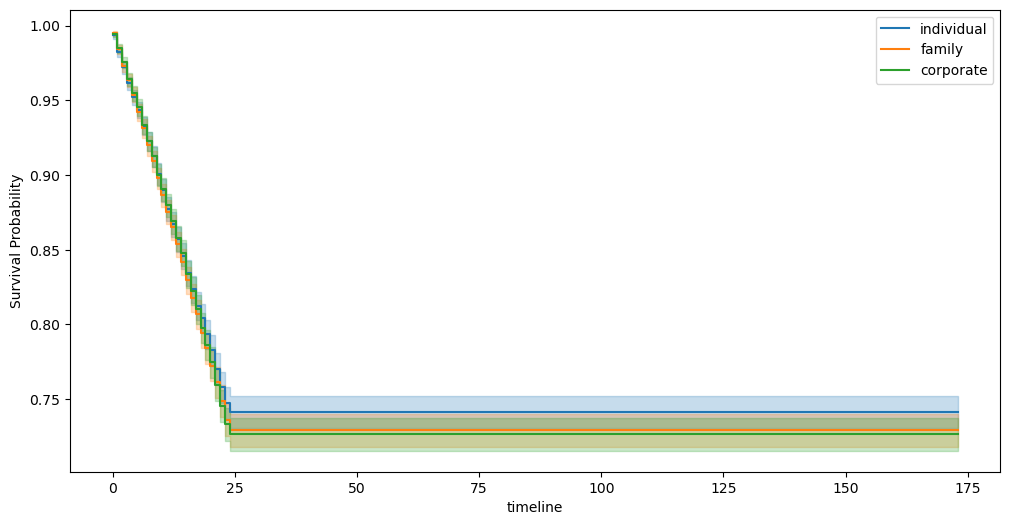

In [10]:
kmf = KaplanMeierFitter() 


T = df['TENURE']     
E = df['CHURNED']      

groups = df['CUSTOMER_SEGMENT']             
ix1 = (groups == 'individual')  
ix2 = (groups == 'family')         
ix3 = (groups == 'corporate')       


kmf.fit(T[ix1], E[ix1], label='individual')    
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='family')         
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='corporate')       
plt.ylabel('Survival Probability') 
plt.savefig('customer segement.png', dpi=300, bbox_inches='tight')  
kmf.plot(ax=ax1)                                

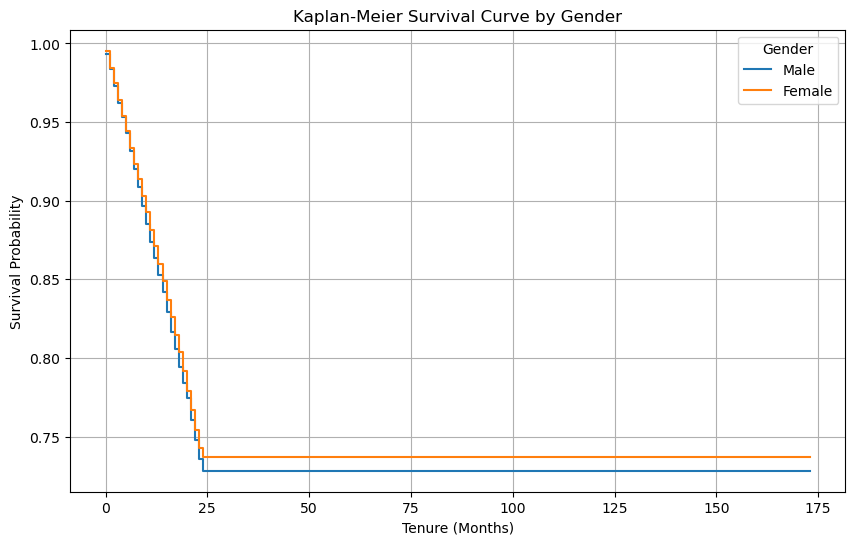

In [11]:

kmf = KaplanMeierFitter()

# Define time to event and event occurrence
T = df['TENURE']  # Time to event (tenure in months)
E = df['CHURNED']  # Event occurred (1 if churned, 0 if not churned)

# Define groups based on gender
groups = df['GENDER']
male_ix = (groups == 'Male')    # Male cohort
female_ix = (groups == 'Female')  # Female cohort

# Plotting the survival function for gender groups
plt.figure(figsize=(10, 6))  # Set figure size for better visualization

# Male group
kmf.fit(T[male_ix], E[male_ix], label='Male')  # Fit data for males
ax = kmf.plot(ci_show=False)  # Plot without confidence intervals for clarity

# Female group
kmf.fit(T[female_ix], E[female_ix], label='Female')  # Fit data for females
kmf.plot(ax=ax, ci_show=False)  # Plot on the same axis as the male group

# Customize plot appearance
plt.title('Kaplan-Meier Survival Curve by Gender')  # Add a title
plt.xlabel('Tenure (Months)')  # Label for the x-axis
plt.ylabel('Survival Probability')  # Label for the y-axis
plt.grid(True)  # Display grid for readability
plt.legend(title='Gender')  # Show legend with title

# Save the plot as a PNG file
plt.savefig('km_survival_curve.png', dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box

plt.show()  # Display the plot


<Axes: xlabel='timeline', ylabel='Survival Probability'>

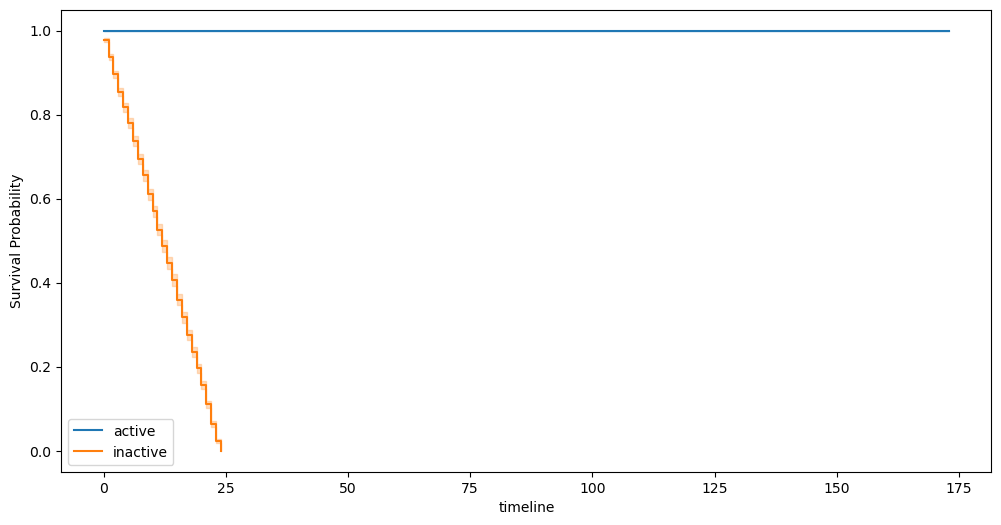

In [12]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object


## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['CUSTOMER_STATUS']   
i1 = (groups == 'active')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'inactive')     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='active')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='inactive')
plt.ylabel('Survival Probability')  # Label for the y-axis
kmf1.plot(ax=a1)

<Axes: xlabel='timeline', ylabel='Survival Probability'>

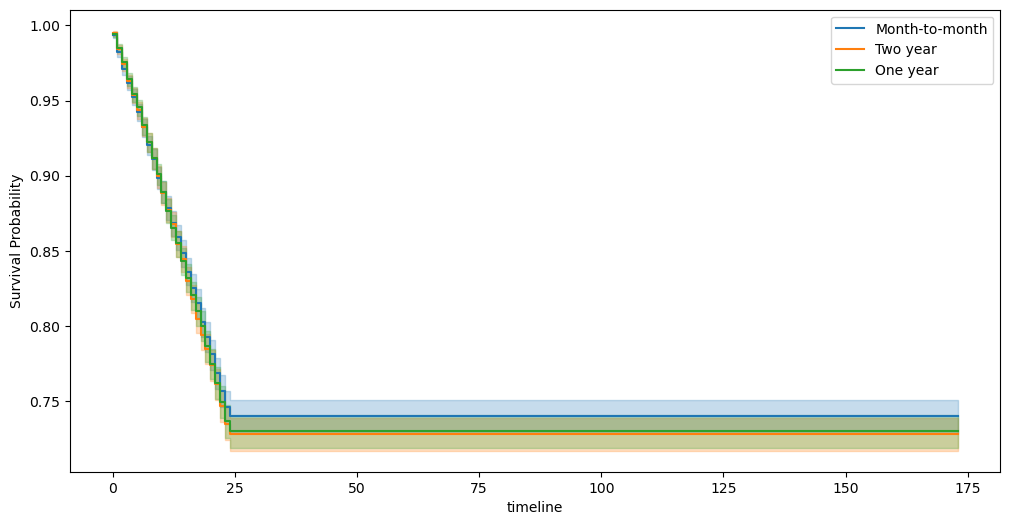

In [13]:
kmf = KaplanMeierFitter() 


T = df['TENURE']     ## time to event
E = df['CHURNED']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
plt.ylabel('Survival Probability')  # Label for the y-axis
plt.savefig('customer Contract Type.png', dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

## Cox Proportional Hazard Model (Survival Regression)

In [14]:
from lifelines import CoxPHFitter  

In [15]:

df_r= df.loc[:,['TENURE','CHURNED','AGE', 'MONTHLY_BILL','DATA_USAGE','GENDER', 'PARTNER', 'DEPENDENTS', 'PHONE_SERVICE', 'SENIORCITIZEN']]
df_r.head() ## have a look at the data 



TENURE  CHURNED  AGE  MONTHLY_BILL  DATA_USAGE  GENDER PARTNER DEPENDENTS  \
0      16        1   29        602.52        7.84    Male     Yes         No   
1       3        0   65        436.90        0.00    Male     Yes        Yes   
2       1        1   39        317.04        9.08  Female      No        Yes   
3     134        0   66        344.32        1.84    Male      No         No   
4     112        0   69        493.88        2.96    Male     Yes        Yes   

  PHONE_SERVICE  SENIORCITIZEN  
0           Yes              0  
1           Yes              1  
2            No              0  
3           Yes              1  
4           Yes              1

In [16]:

df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

TENURE  CHURNED  AGE  MONTHLY_BILL  DATA_USAGE  SENIORCITIZEN  GENDER_Male  \
0      16        1   29        602.52        7.84              0         True   
1       3        0   65        436.90        0.00              1         True   
2       1        1   39        317.04        9.08              0        False   
3     134        0   66        344.32        1.84              1         True   
4     112        0   69        493.88        2.96              1         True   

   PARTNER_Yes  DEPENDENTS_Yes  PHONE_SERVICE_Yes  
0         True           False               True  
1         True            True               True  
2        False            True              False  
3        False           False               True  
4         True            True               True

In [17]:

cph = CoxPHFitter()   
cph.fit(df_dummy, 'TENURE', event_col='CHURNED')  
cph.print_summary()    

<lifelines.CoxPHFitter: fitted with 20000 total observations, 14900 right-censored observations>
             duration col = 'TENURE'
                event col = 'CHURNED'
      baseline estimation = breslow
   number of observations = 20000
number of events observed = 5100
   partial log-likelihood = -49526.96
         time fit was run = 2024-09-02 23:25:38 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
AGE                0.00      1.00      0.00           -0.00            0.00                1.00                1.00
MONTHLY_BILL      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
DATA_USAGE        -0.00      1.00      0.01           -0.02            0.01                0.98                1.01
SENIORCITIZEN     -0.04      0.96      0.05           -0.14            0.06                0.87                1.06
GENDER_Male        0.04      1.04      0.03           -0.02            0.09                0.98                1.10
PARTNER_Yes        0.02      1.02      0.03           -0.03            0.08                0.97                1.08
DEPENDENTS_Yes    -0.04      0.96      0.03           -0.09            0.02                0.91                1.02
PHONE_SERVICE_Yes -0.05      0.95      0.06           -0.17            0.08                0.84                1.08

                   cmp to     z    p  -log2(p)
covariate                                     
AGE                  0.00  1.34 0.18      2.47
MONTHLY_BILL         0.00 -0.48 0.63      0.66
DATA_USAGE           0.00 -0.61 0.54      0.89
SENIORCITIZEN        0.00 -0.76 0.44      1.17
GENDER_Male          0.00  1.39 0.17      2.60
PARTNER_Yes          0.00  0.78 0.43      1.21
DEPENDENTS_Yes       0.00 -1.33 0.18      2.44
PHONE_SERVICE_Yes    0.00 -0.75 0.46      1.13
---
Concordance = 0.51
Partial AIC = 99069.92
log-likelihood ratio test = 14.20 on 8 df
-log2(p) of ll-ratio test = 3.71

<Axes: xlabel='log(HR) (95% CI)'>

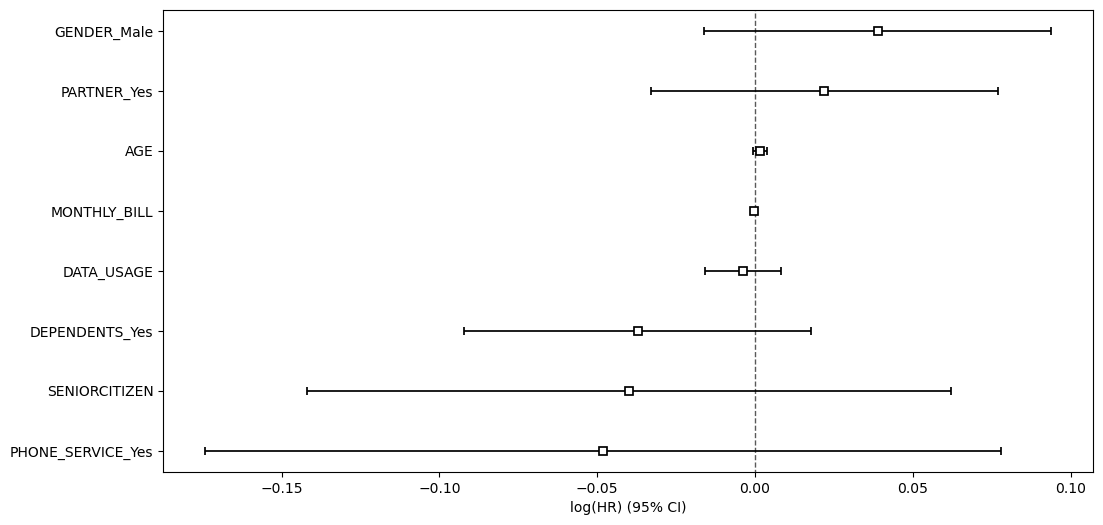

In [18]:
cph.plot()

In [19]:
## Check all the methods and attributes associated with the cph object.
dir(cph)

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwic

In [20]:

tr_rows = df_dummy.iloc[5:9, 2:]
tr_rows

AGE  MONTHLY_BILL  DATA_USAGE  SENIORCITIZEN  GENDER_Male  PARTNER_Yes  \
5   18        437.60        0.00              0         True        False   
6   83        302.09        7.93              1         True        False   
7   81        466.95        5.45              1         True         True   
8   25        336.90        2.90              0        False         True   

   DEPENDENTS_Yes  PHONE_SERVICE_Yes  
5            True               True  
6            True              False  
7           False               True  
8            True               True

Text(0, 0.5, 'Survival Probability')

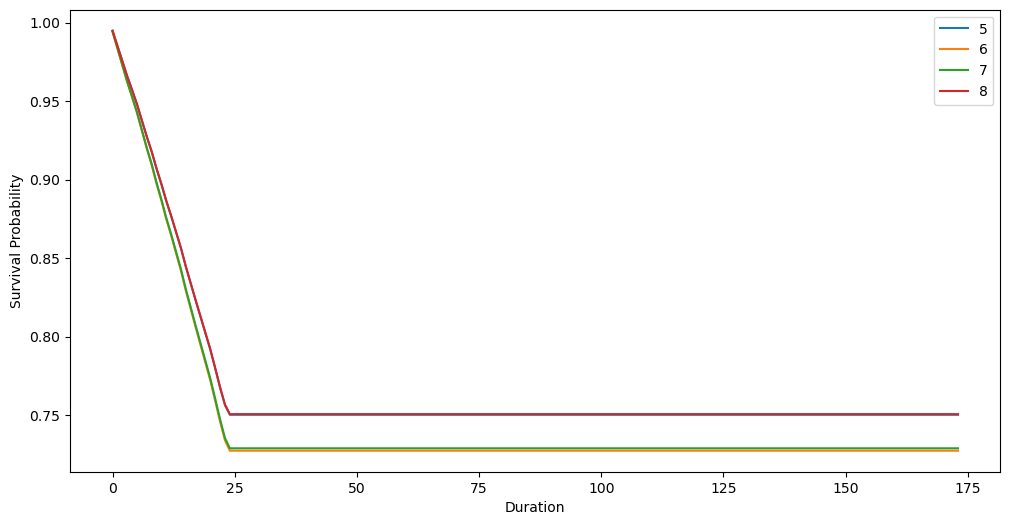

In [21]:

cph.predict_survival_function(tr_rows).plot()
plt.xlabel('Duration')
plt.ylabel('Survival Probability')  

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [23]:
from lifelines.utils import concordance_index


In [24]:
# Predict the risk score
predicted_risks = cph.predict_partial_hazard(df_dummy)

# Calculate the concordance index
c_index = concordance_index(df['TENURE'], -predicted_risks, df['CHURNED'])

print(f"C-index: {c_index}")

C-index: 0.5148915065501617


In [ ]:
Individual customer Analysis

In [25]:
import pandas as pd
from lifelines import KaplanMeierFitter



# Create a KaplanMeierFitter object
km = KaplanMeierFitter()

# Fit the data into the model
km.fit(durations, event_observed, label='Kaplan Meier Estimate')

# Extract survival function
survival_function = km.survival_function_

# Convert survival function to a DataFrame
survival_table = survival_function.reset_index()
survival_table.columns = ['Time', 'Survival Probability']

# Print the table
print(survival_table)

# Save the table to a CSV file
survival_table.to_csv('kaplan_meier_survival_table.csv', index=False)


    Time  Survival Probability
0    0.0              0.978039
1    1.0              0.937059
2    2.0              0.896667
3    3.0              0.855098
4    4.0              0.818235
5    5.0              0.780196
6    6.0              0.737059
7    7.0              0.694510
8    8.0              0.655294
9    9.0              0.610588
10  10.0              0.570196
11  11.0              0.526667
12  12.0              0.488039
13  13.0              0.446667
14  14.0              0.406471
15  15.0              0.360000
16  16.0              0.317843
17  17.0              0.276275
18  18.0              0.235882
19  19.0              0.196275
20  20.0              0.155882
21  21.0              0.110392
22  22.0              0.064118
23  23.0              0.022745
24  24.0              0.000000


       Customer  Survival Probability
0    Customer_0              1.000000
1    Customer_1              0.995374
2    Customer_2              0.995374
3    Customer_3              0.990692
4    Customer_4              0.985970
..          ...                   ...
95  Customer_95              0.521867
96  Customer_96              0.521867
97  Customer_97              0.521867
98  Customer_98              0.521867
99  Customer_99              0.521867

[100 rows x 2 columns]


C:\Users\Vaishanavi\AppData\Local\Temp\ipykernel_5948\3338874346.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to fit the legend


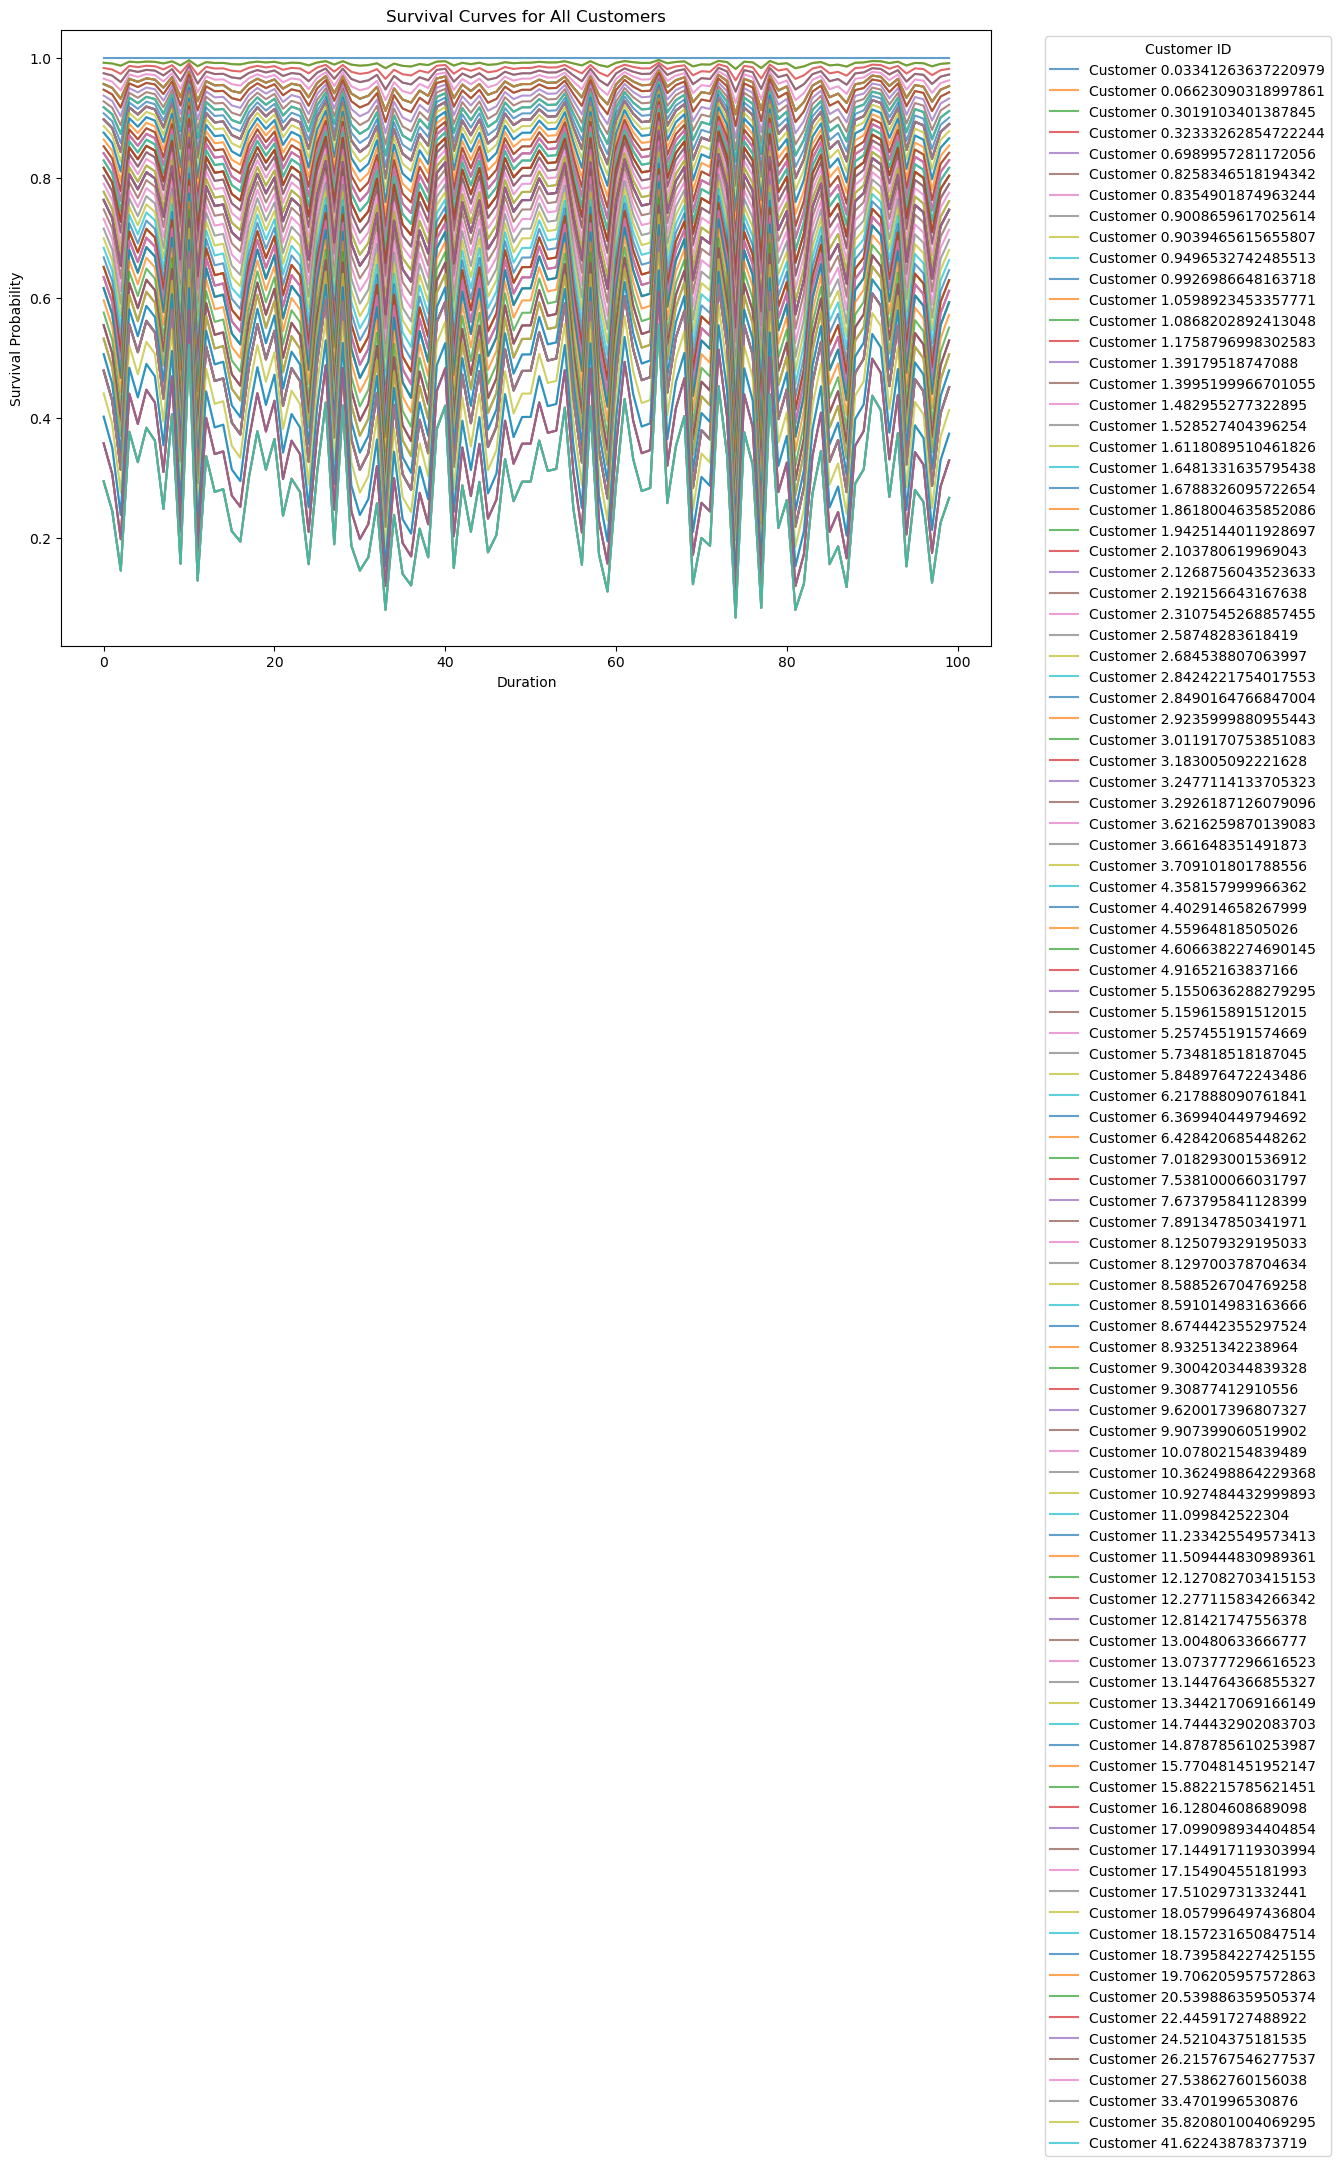

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter


# Example DataFrame (replace with your actual DataFrame)
# df_dummy should include all the required features for prediction
df_dummy = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
    # Add more features as needed
})

# Example: Fit the Cox Proportional Hazards model
# Make sure to fit the model with your actual data and columns
# Assume 'duration' and 'event' columns are present in your original DataFrame
# and should be excluded from df_dummy when predicting
# df_original = pd.read_csv('your_data.csv')
# cph = CoxPHFitter()
# cph.fit(df_original, duration_col='duration', event_col='event')

# For demonstration, creating a dummy CoxPHFitter object and fitting it
cph = CoxPHFitter()
# Dummy example fit (replace with actual fitting)
df_original = pd.DataFrame({
    'duration': np.random.exponential(10, 100),
    'event': np.random.randint(2, size=100),
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
})
cph.fit(df_original, duration_col='duration', event_col='event')

# Predict the survival functions for all customers
survival_functions = cph.predict_survival_function(df_dummy)

# Create a DataFrame for survival probabilities at a specific time point
time_point = 10  # Define the time point you are interested in
probabilities = {}
for i in range(len(survival_functions)):
    probabilities[f'Customer_{i}'] = survival_functions.iloc[i].loc[time_point]

# Convert to DataFrame
probabilities_df = pd.DataFrame(list(probabilities.items()), columns=['Customer', 'Survival Probability'])

# Save the DataFrame to a CSV file
probabilities_df.to_csv('customer_survival_probabilities.csv', index=False)

# Print the DataFrame to check
print(probabilities_df)

# Plot survival functions for all customers
plt.figure(figsize=(12, 8))
for i, survival_function in survival_functions.iterrows():
    plt.plot(survival_function.index, survival_function.values, label=f'Customer {i}', alpha=0.7)

plt.xlabel('Duration')
plt.ylabel('Survival Probability')  # Label for the y-axis
plt.title('Survival Curves for All Customers')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


       Customer  Survival Probability
99  Customer_99              0.097708
98  Customer_98              0.097708
97  Customer_97              0.097708
96  Customer_96              0.134024
95  Customer_95              0.169728


C:\Users\Vaishanavi\AppData\Local\Temp\ipykernel_5948\1460118748.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


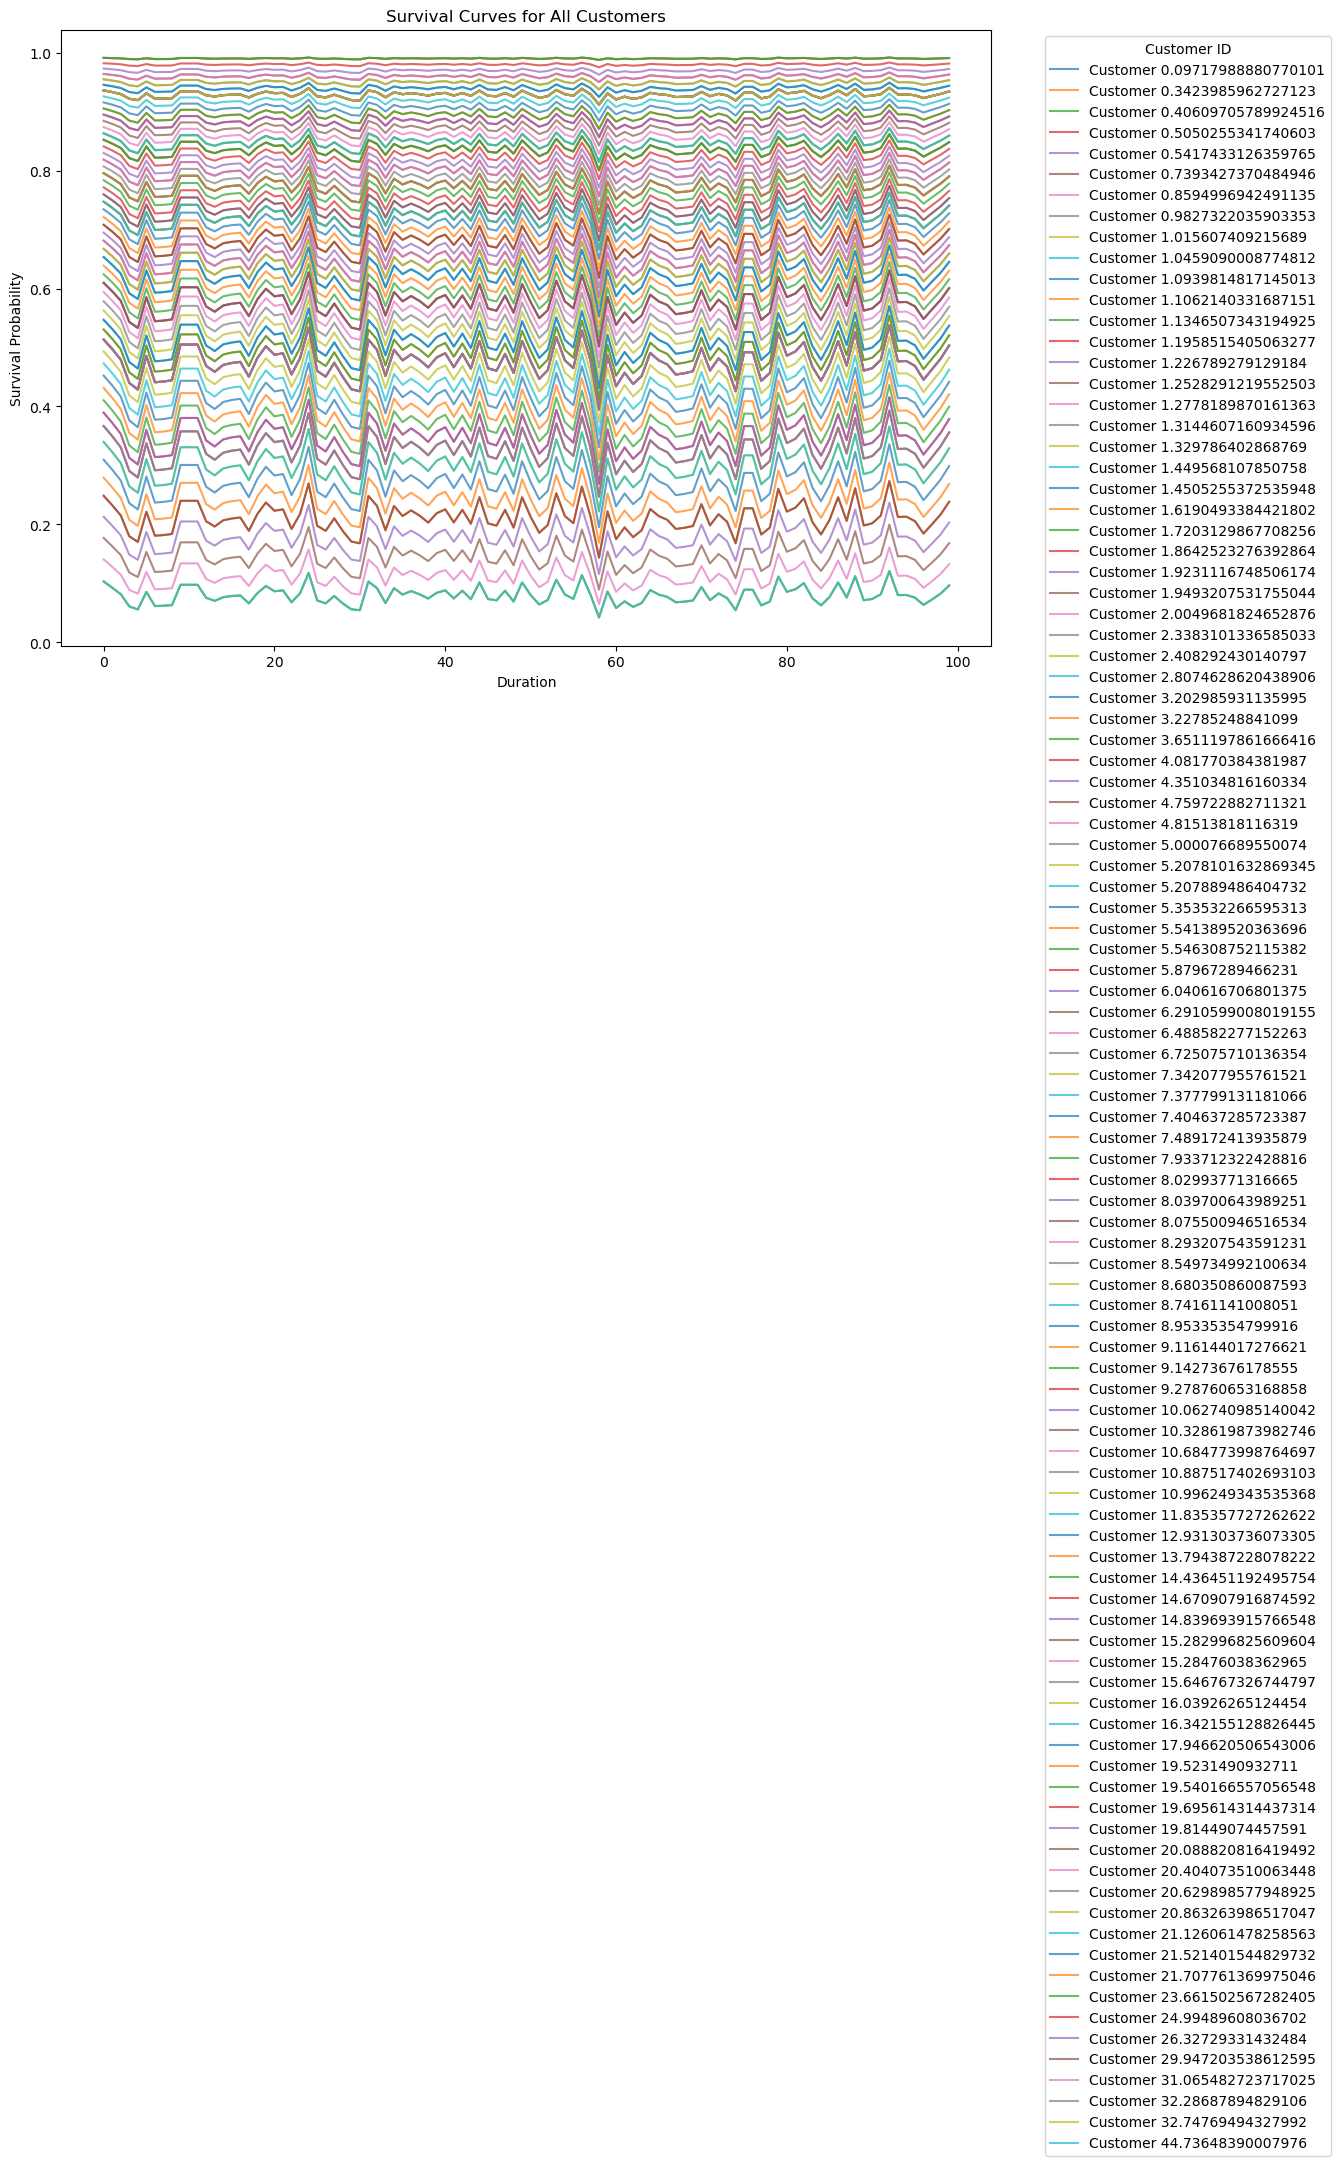

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Example DataFrame (replace with your actual DataFrame)
df_dummy = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
})

# Create a dummy CoxPHFitter object and fit it with example data
cph = CoxPHFitter()
df_original = pd.DataFrame({
    'duration': np.random.exponential(10, 100),
    'event': np.random.randint(2, size=100),
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
})
cph.fit(df_original, duration_col='duration', event_col='event')

# Predict the survival functions for all customers
survival_functions = cph.predict_survival_function(df_dummy)

# Create a DataFrame for survival probabilities at a specific time point
time_point = 10  # Define the time point you are interested in
probabilities = {}
for i in range(len(survival_functions)):
    probabilities[f'Customer_{i}'] = survival_functions.iloc[i].loc[time_point]

# Convert to DataFrame
probabilities_df = pd.DataFrame(list(probabilities.items()), columns=['Customer', 'Survival Probability'])

# Sort customers by survival probability (ascending) to find the highest risk
top_risk_customers = probabilities_df.sort_values(by='Survival Probability').head(5)

# Save the DataFrame to a CSV file
top_risk_customers.to_csv('top_risk_customers.csv', index=False)

# Print the DataFrame to check
print(top_risk_customers)

# Plot survival functions for all customers (optional)
plt.figure(figsize=(12, 8))
for i, survival_function in survival_functions.iterrows():
    plt.plot(survival_function.index, survival_function.values, label=f'Customer {i}', alpha=0.7)

plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.title('Survival Curves for All Customers')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


             Customer  Survival Probability
19999  Customer_19999              0.008101
19996  Customer_19996              0.008101
19998  Customer_19998              0.008101
19997  Customer_19997              0.008101
19995  Customer_19995              0.010369


C:\Users\Vaishanavi\AppData\Local\Temp\ipykernel_5948\2831782724.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


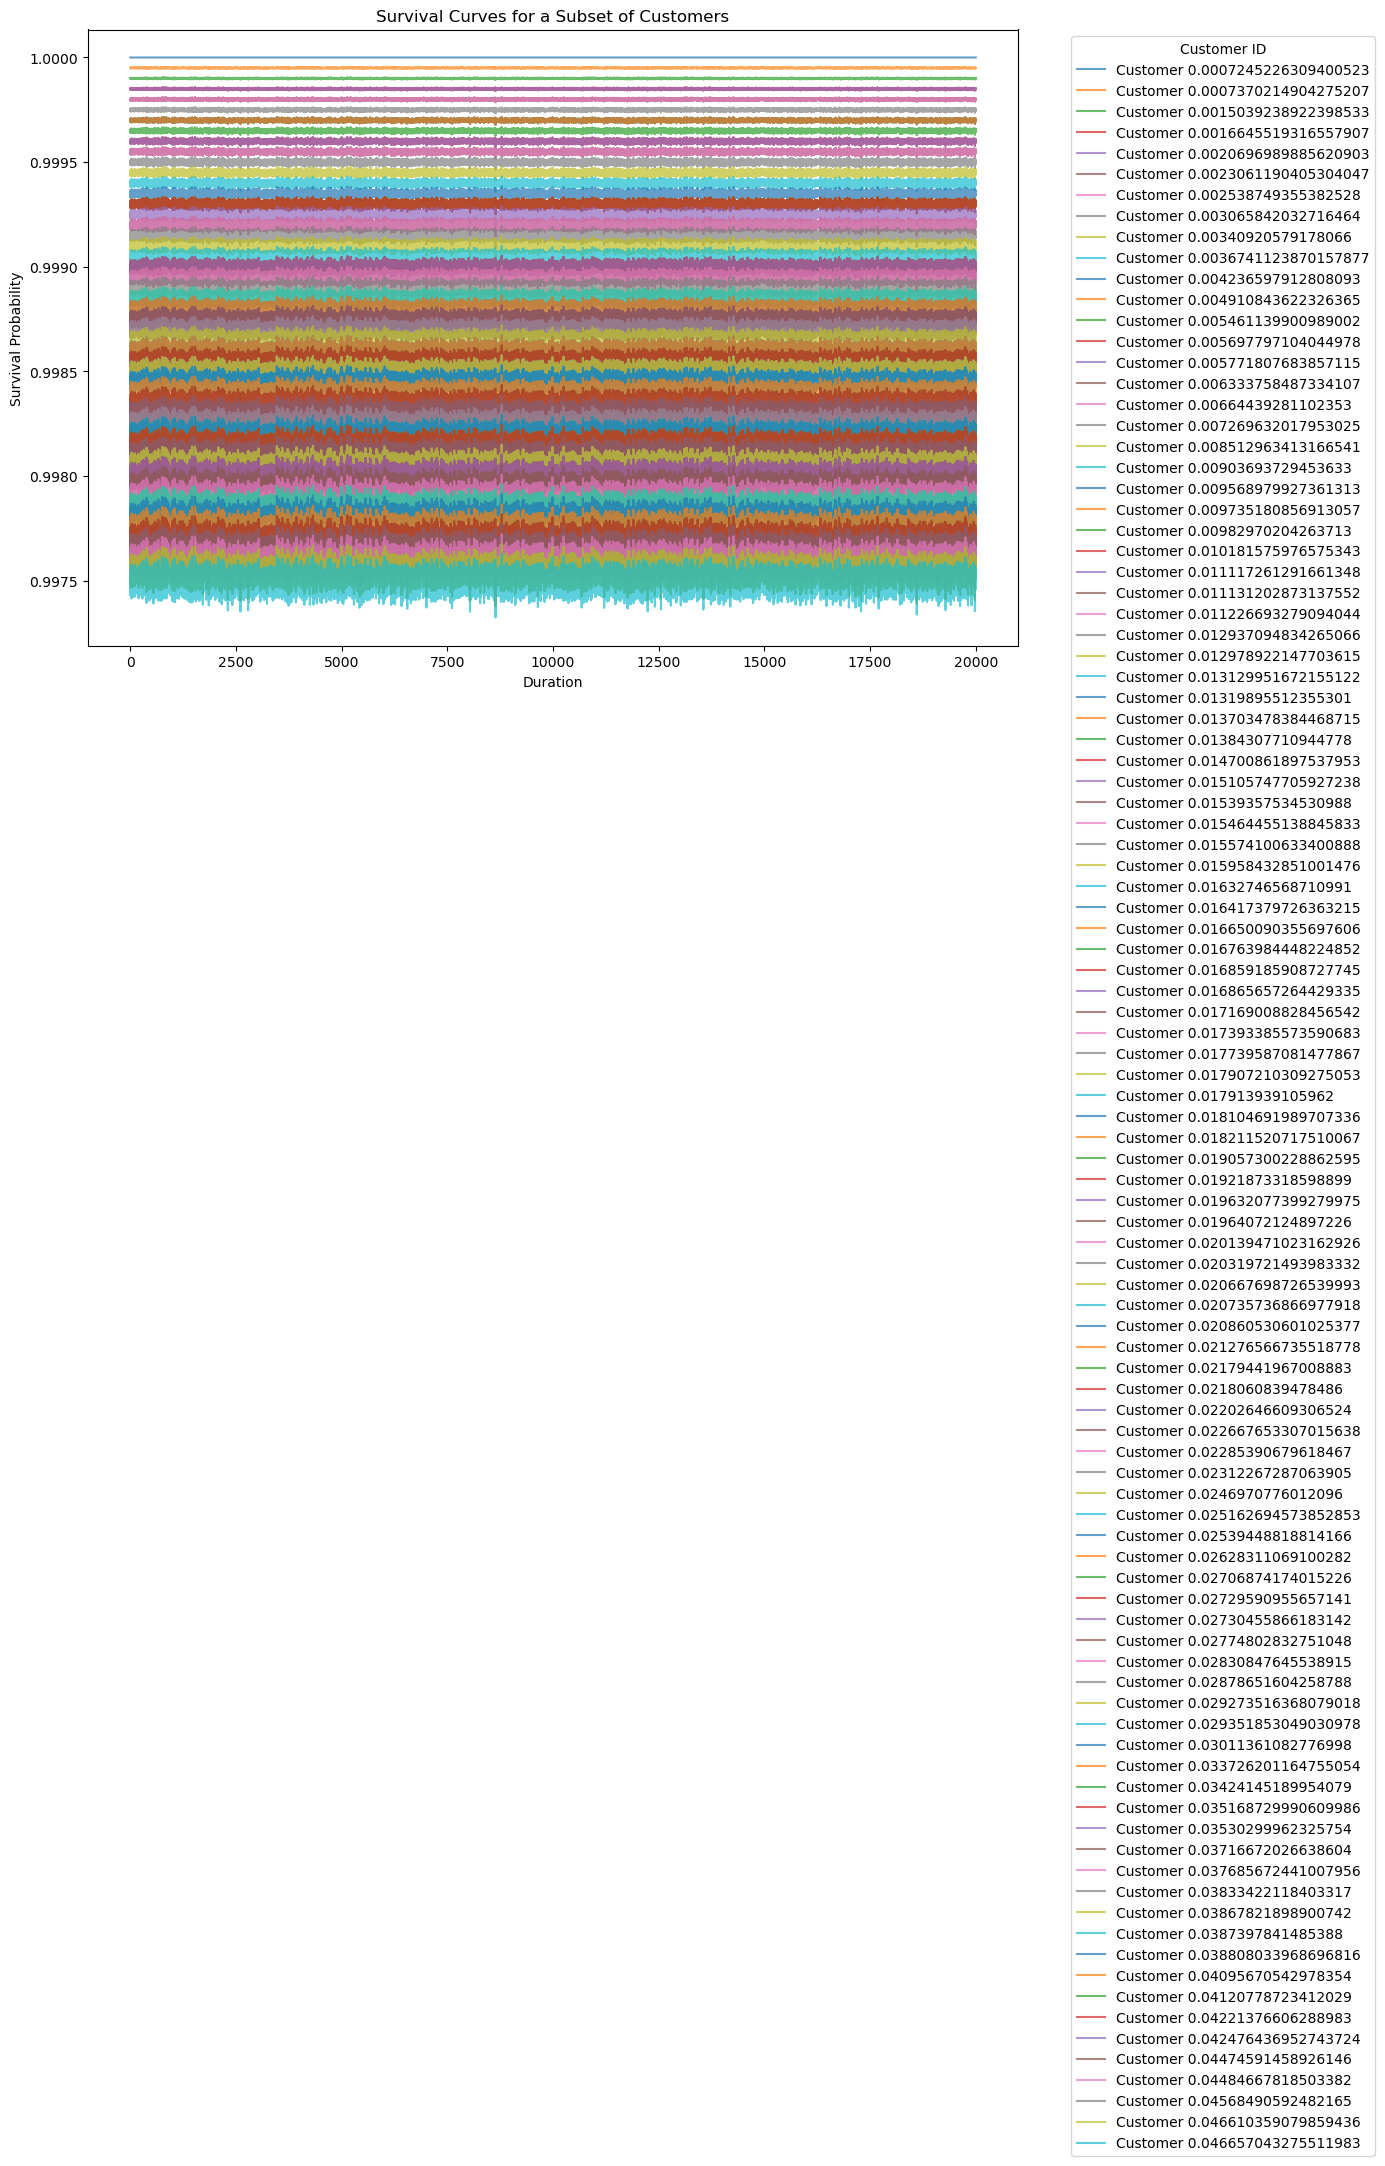

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter


np.random.seed(0)  
df_original = pd.DataFrame({
    'duration': np.random.exponential(10, 20000),
    'event': np.random.randint(2, size=20000),
    'feature1': np.random.randn(20000),
    'feature2': np.random.randn(20000),
    'feature3': np.random.randn(20000),
    # Add more features as needed
})

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_original, duration_col='duration', event_col='event')

# Create a DataFrame for new customer data
# Replace with your actual customer data for prediction
df_dummy = pd.DataFrame({
    'feature1': np.random.randn(20000),
    'feature2': np.random.randn(20000),
    'feature3': np.random.randn(20000),
    # Add more features as needed
})

# Predict the survival functions for all customers
survival_functions = cph.predict_survival_function(df_dummy)

# Create a DataFrame for survival probabilities at a specific time point
time_point = 10  # Define the time point you are interested in
probabilities = {}
for i in range(len(survival_functions)):
    probabilities[f'Customer_{i}'] = survival_functions.iloc[i].loc[time_point]

# Convert to DataFrame
probabilities_df = pd.DataFrame(list(probabilities.items()), columns=['Customer', 'Survival Probability'])

# Sort customers by survival probability (ascending) to find the highest risk
top_risk_customers = probabilities_df.sort_values(by='Survival Probability').head(5)

# Save the DataFrame to a CSV file
top_risk_customers.to_csv('top_risk_customers.csv', index=False)

# Print the DataFrame to check
print(top_risk_customers)

# Plot survival functions for a subset of customers (optional for visualization)
plt.figure(figsize=(12, 8))
for i, survival_function in survival_functions.head(100).iterrows():  # Plotting only first 100 for clarity
    plt.plot(survival_function.index, survival_function.values, label=f'Customer {i}', alpha=0.7)

plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.title('Survival Curves for a Subset of Customers')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Load your actual DataFrame from a CSV file
df_original = pd.read_csv('Telco_Churn_Customer.csv')
## Convert TotalCharges to numeric
df_original['MONTHLY_BILL']=pd.to_numeric(df_original['MONTHLY_BILL'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df_original['CHURNED']=df_original['CHURNED'].apply(lambda x: 1 if x == 'Yes' else 0 )

# Create a list of Categorical Columns
cat_cols = [i for i in df_original.columns if df_original[i].dtype == object]

# Remove specific columns from the list
for col in ['SERVICE_ID','CUSTOMER_SINCE','CUSTOMER_DISCONNCT_DATE','COUNTRY','STATE','CHURN_REASON']:
    if col in cat_cols:
        cat_cols.remove(col)

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_original, duration_col='TENURE', event_col='CHURNED')

# Load the new customer data from another CSV file for prediction
df_dummy = pd.read_csv('customer_data.csv')

# Batch processing parameters
batch_size = 1000
num_batches = len(df_dummy) // batch_size + (len(df_dummy) % batch_size != 0)

# Initialize lists to store results
all_probabilities = []

# Process data in batches
for i in range(num_batches):
    batch_df = df_dummy.iloc[i * batch_size:(i + 1) * batch_size]
    
    # Predict the survival functions for the batch
    survival_functions = cph.predict_survival_function(batch_df)
    
    # Find available time points
    available_times = survival_functions.index
    
    # Define the time point you are interested in
    time_point = 15  # Define the time point you are interested in
    
    # Ensure time_point is within available times or use closest available
    if time_point not in available_times:
        # Find the closest available time point within a tolerance
        tolerance = 1e-5  # Define tolerance for floating point precision
        closest_time_point = min(available_times, key=lambda x: abs(x - time_point))
        
        # Check if the closest time point is within tolerance
        if abs(closest_time_point - time_point) > tolerance:
            print(f"Time point {time_point} not found within tolerance. Using closest available time point {closest_time_point}.")
        time_point = closest_time_point

    # Extract survival probabilities at the specific time point
    batch_probabilities = {}
    for j in range(len(survival_functions)):
        try:
            batch_probabilities[f'Customer_{i * batch_size + j}'] = survival_functions.iloc[j].loc[time_point]
        except KeyError:
            print(f"KeyError for customer {i * batch_size + j} at time point {time_point}.")
            batch_probabilities[f'Customer_{i * batch_size + j}'] = np.nan  # Handle missing values

    # Convert to DataFrame
    batch_probabilities_df = pd.DataFrame(list(batch_probabilities.items()), columns=['Customer', 'Survival Probability'])
    all_probabilities.append(batch_probabilities_df)

# Concatenate all batch results into a single DataFrame
probabilities_df = pd.concat(all_probabilities, ignore_index=True)

# Sort customers by survival probability (ascending) to find the highest risk
top_risk_customers = probabilities_df.sort_values(by='Survival Probability').head(5)

# Save the table of survival probabilities for all customers
probabilities_df.to_csv('customer_survival_probabilities.csv', index=False)

# Save the top 5 high-risk customers to a separate CSV file
top_risk_customers.to_csv('top_risk_customers.csv', index=False)

# Print the tables to check
print("Top 5 High-Risk Customers:")
print(top_risk_customers)

print("\nSurvival Probabilities for All Customers:")
print(probabilities_df.head())  # Print first few rows for brevity

# Plot survival functions for the top 5 high-risk customers
plt.figure(figsize=(12, 8))
top_indices = [int(cust.split('_')[1]) for cust in top_risk_customers['Customer']]
for idx in top_indices:
    plt.plot(survival_functions.iloc[idx].index, survival_functions.iloc[idx].values, label=f'Customer {idx}')

plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.title('Survival Curves for Top 5 High-Risk Customers')
plt.legend(title='Customer ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: '8099-FFFIP'